In [1]:
from nglview.contrib.movie import MovieMaker
import MDAnalysis.transformations as trans
import MDAnalysis as mda
import nglview as nv
import os
import tempfile
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
cwd = os.getcwd()
sep = os.sep 
TRAJ_DIR = cwd + sep + "trajectories"
MUTANT_TOP = cwd + sep + "topologies"
MUTANT_TOP

'/home/ugo/Scrivania/Transthyretin/molecular_dynamics/topologies'

In [3]:
mutants_gro = []
for file in os.listdir(MUTANT_TOP):
    if file.endswith(".gro"):
        mutants_gro.append(file.split(".")[0].split("_")[0])
print("Mutants found: ", mutants_gro)

Mutants found:  ['wt-tetramer', 'a45t-tetramer', 'v50m-tetramer']


In [4]:
mutants_xtc = []
for file in os.listdir(TRAJ_DIR):
    if file.endswith(".xtc"):
        mutants_xtc.append(file.split(".")[0].split("_")[0])
print("Mutants found in trajectories: ", mutants_xtc)

Mutants found in trajectories:  ['a45t-tetramer', 'v50m-tetramer', 'wt-tetramer']


In [5]:
mutants = []
mutants_notfound = []
for mutant in mutants_gro:
    if mutant in mutants_xtc:
        mutants.append(mutant)
    else:
        mutants_notfound.append(mutant)
print("Mutants found in both topologies and trajectories: ", mutants)
print("Mutants not found: ", mutants_notfound)

Mutants found in both topologies and trajectories:  ['wt-tetramer', 'a45t-tetramer', 'v50m-tetramer']
Mutants not found:  []


In [6]:
mutants = []
mutants_notfound = []
for mutant in mutants_gro:
    if mutant in mutants_xtc:
        mutants.append(mutant)
    else:
        mutants_notfound.append(mutant)
print("Mutants found in both topologies and trajectories: ", mutants)
print("Mutants not found: ", mutants_notfound)

Mutants found in both topologies and trajectories:  ['wt-tetramer', 'a45t-tetramer', 'v50m-tetramer']
Mutants not found:  []


In [7]:
parent_dir = os.path.join(cwd, os.pardir)
parent_dir = os.path.abspath(parent_dir)
PROTEIN_DIR = parent_dir + sep + "pdbs-alphafold" + sep + "tetramer"

In [13]:
import moviepy.editor as mpy
from IPython import display
from time import sleep 

stride  = 1
TRAJ_PLOT = cwd + sep + "traj_plots"
frame_per_second = 5
image_paths = []
frame_times = []

mutant = "v50m-tetramer"
#mutant = mutants[0]
    
print(f"Processing mutant: {mutant}")
gro_file = os.path.join(MUTANT_TOP, f"{mutant}_md.gro")
pdb_file = os.path.join(PROTEIN_DIR, f"{mutant}.pdb")
xtc_file = os.path.join(TRAJ_DIR, f"{mutant}.xtc")
out_file_gif = os.path.join(TRAJ_PLOT, f"{mutant}.gif")
out_file = os.path.join(TRAJ_PLOT, f"{mutant}.pdf")
print(gro_file, ",", xtc_file)

u = mda.Universe(gro_file, xtc_file, continuos = True)

Processing mutant: v50m-tetramer
/home/ugo/Scrivania/Transthyretin/molecular_dynamics/topologies/v50m-tetramer_md.gro , /home/ugo/Scrivania/Transthyretin/molecular_dynamics/trajectories/v50m-tetramer.xtc


In [14]:
view = nv.show_mdanalysis(u)
view.clear()
view.add_cartoon('protein', color_scheme="chainname")
view.center()
view

NGLWidget(max_frame=100)

In [15]:
from pathlib import Path
download_folder = str(Path.home() / "Scaricati")
download_folder

'/home/ugo/Scaricati'

In [27]:
total_frames = len(u.trajectory)
n_frames_pdf = 5
stride_pdf = max(1, (total_frames) // n_frames_pdf)
frame_pdf = [i * stride_pdf for i in range(n_frames_pdf)]
frame_pdf.append(total_frames-1)
frame_pdf

[0, 20, 40, 60, 80, 100]

In [34]:
template = "image{}.png"
stride = 10
imagefiles = [download_folder + sep + template.format(str(i)) for i in range(0, total_frames, stride)]
image_paths = []
frame_times = []
for frame in range(0, total_frames, stride):
    print(frame)
    view.frame = frame
    sleep(0.5)
    imagename = template.format(str(frame))
    view.download_image(filename=imagename, transparent = True, trim = True)
    if frame in frame_pdf:
        u.trajectory[frame]
        frame_time = u.trajectory.time
        frame_times.append(frame_time)
        image_paths.append(imagename)
    sleep(2.0)
image_paths

0
10
20
30
40
50
60
70
80
90
100


['image0.png',
 'image20.png',
 'image40.png',
 'image60.png',
 'image80.png',
 'image100.png']

In [35]:
im = mpy.ImageSequenceClip(imagefiles, fps=frame_per_second)
im.write_gif(out_file_gif, fps=frame_per_second)#, program='ffmpeg')


[MoviePy] Building file /home/ugo/Scrivania/Transthyretin/molecular_dynamics/traj_plots/v50m-tetramer.gif with imageio


100%|██████████████████████████████████████████| 11/11 [00:00<00:00, 111.20it/s]


In [36]:
image_paths, frame_times

(['image0.png',
  'image20.png',
  'image40.png',
  'image60.png',
  'image80.png',
  'image100.png'],
 [0.0, 200.0, 400.0, 600.0, 800.0, 1000.0])

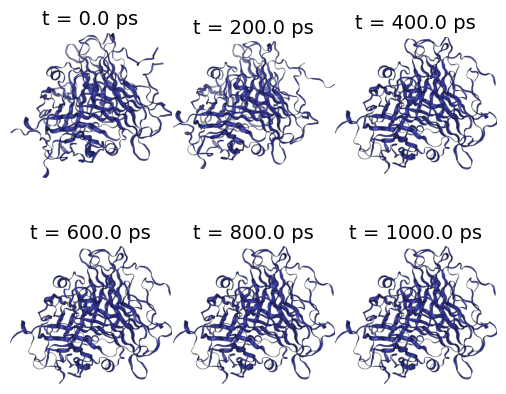

In [37]:
nrows = 2
ncols = 3 
fig, axes = plt.subplots(nrows, ncols, figsize=(5, 5))
for idx, (img_path, frame_time) in enumerate(zip(image_paths, frame_times)):
    img_path = download_folder + sep + img_path
    if os.path.exists(img_path):
        row = idx // ncols
        col = idx % ncols
        ax = axes[row, col]
        img = plt.imread(img_path)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"t = {frame_time:.1f} ps", fontsize=14)
        
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.05, hspace=0.05)
plt.tight_layout(pad=0.5, w_pad=0.1, h_pad=0.1)
plt.show()

In [38]:
with PdfPages(out_file) as pdf:
    pdf.savefig(fig, dpi=600)

In [22]:
for img_path in imagefiles:
    if os.path.exists(img_path):
        os.remove(img_path)

In [22]:
"""
# Create and configure the movie maker
movie = MovieMaker(
    view,
    step=stride,
    download = 
    fps=5,
    output=out_file,
    render_params={"factor": 3},
    in_memory=True,  # Set to True to keep the movie in memory
)
    
# Make the movie and verify it was created
movie.make(movie=True, keep_data=True)
"""

IntProgress(value=0, description='Rendering ...')

In [ ]:
import numpy as np 

def read_xvg(filename):
    if not os.path.exists(filename):
        print(f"File {filename} does not exist.")
        return None
    else:
        print(f"Reading file {filename}")
        x,y = np.loadtxt(filename,comments=["#", "@"],unpack=True)
        return x, y

In [71]:
import os 

cwd = os.getcwd()
sep = os.sep

TRAJ_PLOT = cwd + sep + "traj_plots"
RMSD_DIR = cwd + sep + "rmsd"

files = [file for file in os.listdir(RMSD_DIR) if "rmsf.xvg" in file]
mutants = [file.split("_")[0] for file in files]
print(mutants)

rmsfs = {}
rmsds = {}
ligand = None
for mutant in mutants:

    if ligand is None:
        filename = f"{RMSD_DIR}/{mutant}_rmsf.xvg"
        filename_rmsd = f"{RMSD_DIR}/{mutant}.xvg"
        plotname = f"{TRAJ_PLOT}/mutants_rmsf_compare.pdf"
    else:
        filename = f"{RMSD_DIR}/{mutant}_{ligand}_rmsf.xvg"
        filename_rmsd = f"{RMSD_DIR}/{mutant}_{ligand}.xvg"
        plotname = f"{TRAJ_PLOT}/{ligand}_mutants_rmsf_compare.pdf"

    if os.path.exists(filename):
        t_f, rmsf = read_xvg(filename=filename)
        rmsfs[mutant] = {"t": t_f, "rmsf": rmsf}
    if os.path.exists(filename_rmsd):    
        t, rmsd = read_xvg(filename=filename_rmsd)
        rmsds[mutant] = {"t": t, "rmsd": rmsd}

['v50m-tetramer', 'wt-tetramer', 'a45t-tetramer']
Reading file /home/ugo/Scrivania/Transthyretin/molecular_dynamics/rmsd/v50m-tetramer_rmsf.xvg
Reading file /home/ugo/Scrivania/Transthyretin/molecular_dynamics/rmsd/v50m-tetramer.xvg
Reading file /home/ugo/Scrivania/Transthyretin/molecular_dynamics/rmsd/wt-tetramer_rmsf.xvg
Reading file /home/ugo/Scrivania/Transthyretin/molecular_dynamics/rmsd/wt-tetramer.xvg
Reading file /home/ugo/Scrivania/Transthyretin/molecular_dynamics/rmsd/a45t-tetramer_rmsf.xvg
Reading file /home/ugo/Scrivania/Transthyretin/molecular_dynamics/rmsd/a45t-tetramer.xvg


In [76]:
def plot_compare(datas, plotname, mode = "rmsf"):

    import plotly.graph_objects as go

    # Create a figure
    fig = go.Figure()
    # Add a line plot for each mutant
    for mutant, data in datas.items():
        t = data["t"]
        data = data[mode]
        fig.add_trace(go.Scatter(x=t, y=data, mode='lines', name=mutant))#, fill='tozeroy'))
        
    # Set the title and labels
    if mode == "rmsf":
        label = "RMSF"
        x_title = 'Residue ID (atom)'
        y_title = 'RMSF (nm)'
    else:
        label = "RMSD"
        x_title = 'Time (ns)'
        y_title = 'RMSD (nm)'

    fig.update_layout(title=f'{label} of mutants',
                        xaxis_title=x_title,
                        yaxis_title=y_title,
                        template='plotly_white',
                        xaxis=dict(showgrid=True, zeroline=True),
                        yaxis=dict(showgrid=True, zeroline=True),
                        legend=dict(title='Mutants'),
                        margin=dict(l=40, r=40, t=40, b=40),
    )   
    # Save the figure as a PDF file
    #fig.write_image(plotname, format="pdf", width=800, height=600)
    # Display the figure
    fig.show()

In [79]:
plot_compare(rmsds, plotname, mode = "rmsd")

In [81]:
plot_compare(rmsfs, plotname)